In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from scipy.stats import skew, kurtosis
from collections import Counter
import geopandas as gpd
from geopy.geocoders import Nominatim

In [3]:
# Load Dataset
data = pd.read_csv(r"C:\CHRIST\Cognifyz\Dataset .csv")

In [4]:
# View top 10 rows of the dataset
print(data.head(10))

   Restaurant ID                           Restaurant Name  Country Code  \
0        6317637                          Le Petit Souffle           162   
1        6304287                          Izakaya Kikufuji           162   
2        6300002                    Heat - Edsa Shangri-La           162   
3        6318506                                      Ooma           162   
4        6314302                               Sambo Kojin           162   
5       18189371                              Din Tai Fung           162   
6        6300781                                Buffet 101           162   
7        6301290                                   Vikings           162   
8        6300010  Spiral - Sofitel Philippine Plaza Manila           162   
9        6314987                                  Locavore           162   

               City                                            Address  \
0       Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1       Makati 

### Task 1: DATA EXPLORATION AND PREPROCESSING 

In [5]:
# Explore dataset size
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 9551
Number of columns: 21


In [6]:
# Check for duplicate values
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
# Check for missing and empty values
missing_values = data.isna().sum().sum()
empty_values = (data == '').sum().sum()
print(f"Missing values count: {missing_values}")
print(f"Empty values count: {empty_values}")

Missing values count: 9
Empty values count: 0


In [8]:
# Find columns with empty values
empty_counts = (data == '').sum()
print("Empty Values Count:")
print(empty_counts[empty_counts > 0])

Empty Values Count:
Series([], dtype: int64)


In [9]:
# Remove rows where 'Cuisines' is empty
data = data[data['Cuisines'] != '']

In [10]:
# Display dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
# Analyze target variable distribution
print("Distribution of target variable:")
print(data['Aggregate rating'].value_counts())

Distribution of target variable:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [12]:
# Check if the distribution is balanced
ratings_counts = data['Aggregate rating'].value_counts()
is_balanced = all(ratings_counts >= np.mean(ratings_counts))
print("The distribution of the target variable is balanced." if is_balanced else "The distribution is imbalanced.")

The distribution is imbalanced.


### Task 2: DESCRIPTIVE ANALYSIS 

In [13]:
# Statistical Measures for Numerical Columns
summary_stats = data.describe()
print(summary_stats)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [16]:
# Calculate standard deviation
std_devs = data.select_dtypes(include=['number']).std()
print("Standard deviation for numerical columns:")
print(std_devs)

Standard deviation for numerical columns:
Restaurant ID           8.791521e+06
Country Code            5.675055e+01
Longitude               4.146706e+01
Latitude                1.100794e+01
Average Cost for two    1.612118e+04
Price range             9.056088e-01
Aggregate rating        1.516378e+00
Votes                   4.301691e+02
dtype: float64


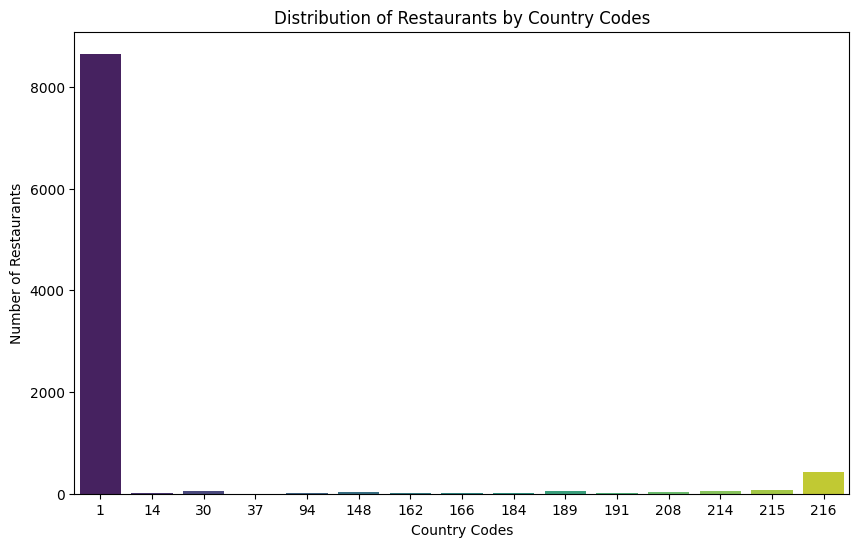

In [17]:
# Visualizing Categorical Variables
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Country Code'], palette='viridis')
plt.title("Distribution of Restaurants by Country Codes")
plt.xlabel("Country Codes")
plt.ylabel("Number of Restaurants")
plt.show()

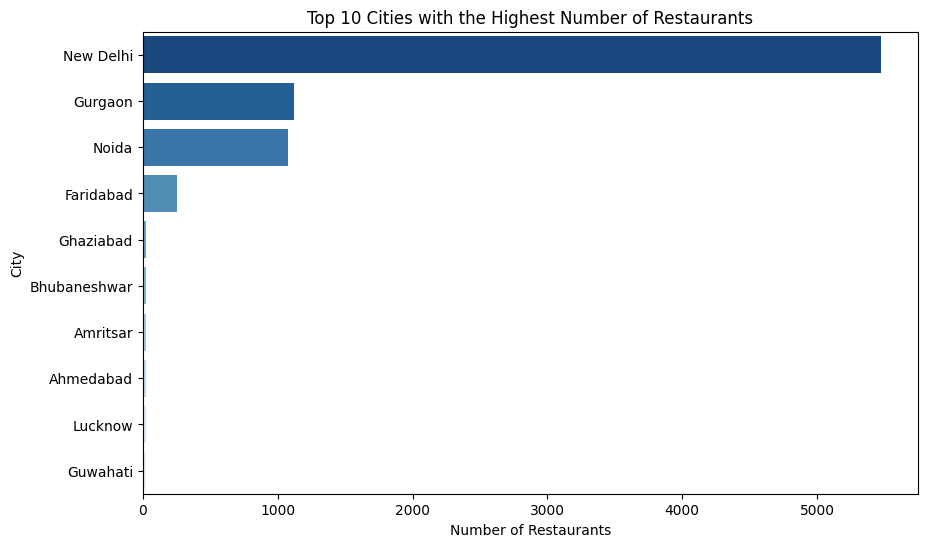

In [18]:
# Top 10 cities with the most restaurants
top_10_cities = data['City'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_cities.index, x=top_10_cities.values, palette='Blues_r')
plt.title("Top 10 Cities with the Highest Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

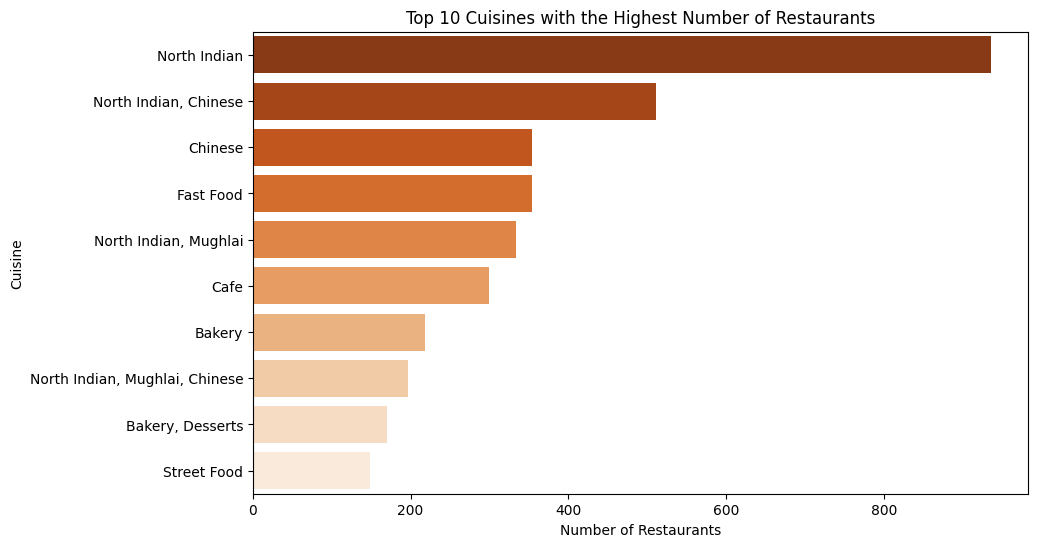

In [19]:
# Top 10 cuisines
top_10_cuisines = data['Cuisines'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_cuisines.index, x=top_10_cuisines.values, palette='Oranges_r')
plt.title("Top 10 Cuisines with the Highest Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()

In [20]:
# Top cuisines and cities DataFrame
top_cuisines_df = pd.DataFrame({'Cuisine': top_10_cuisines.index, 'Count': top_10_cuisines.values})
top_cities_df = pd.DataFrame({'City': top_10_cities.index, 'Count': top_10_cities.values})
print("Top 10 Cuisines:")
print(top_cuisines_df)
print("Top 10 Cities:")
print(top_cities_df)

Top 10 Cuisines:
                          Cuisine  Count
0                    North Indian    936
1           North Indian, Chinese    511
2                         Chinese    354
3                       Fast Food    354
4           North Indian, Mughlai    334
5                            Cafe    299
6                          Bakery    218
7  North Indian, Mughlai, Chinese    197
8                Bakery, Desserts    170
9                     Street Food    149
Top 10 Cities:
           City  Count
0     New Delhi   5473
1       Gurgaon   1118
2         Noida   1080
3     Faridabad    251
4     Ghaziabad     25
5  Bhubaneshwar     21
6      Amritsar     21
7     Ahmedabad     21
8       Lucknow     21
9      Guwahati     21


### Task 3: GEOSPATIAL ANALYSIS 

In [24]:
# Restaurant Locations on a Map
restaurant_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=2)
marker_cluster = MarkerCluster().add_to(restaurant_map)

In [22]:
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Restaurant in {row['City']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

restaurant_map.save("restaurant_map.html")


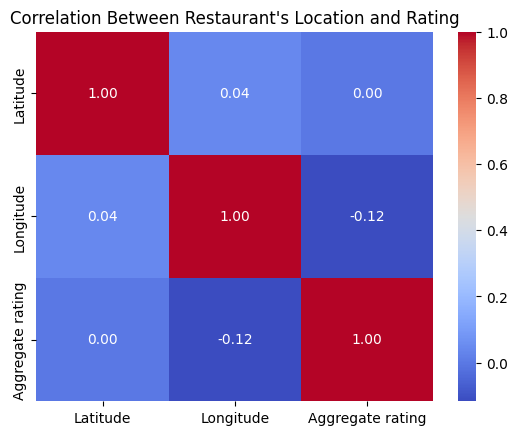

In [23]:
# Correlation between Location and Rating
corr_matrix = data[['Latitude', 'Longitude', 'Aggregate rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Restaurant's Location and Rating")
plt.show()